# Libraries & Data Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

# Path definition
path_df = "/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/20_Data/raw_data_LFB_merged/"

In [9]:
df = pd.read_csv(path_df+'df_clean_before_NaNs_with_datetime_infos_with_geo.csv', index_col = "IncidentNumber", dtype={"IncidentNumber": "str"}, parse_dates=['DateTimeCall'])
df.head()

,DateTimeCall,DeployedFromStation_Name,DeployedFromLocation,PlusCode_Description,IncidentGroup,StopCodeDescription,PropertyCategory,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,Easting_rounded,Northing_rounded,IncidentStationGround,FirstPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,TotalResponseTime,NumCalls_bins,NumCalls_bins_encoded,Month,Year,WeekDay,Day_of_Month,is_weekend,Hour,BankHoliday,Longitude,Latitude,CellEastingNorthing100,CellEastingNorthing250,CellEastingNorthing500,CellEastingNorthing1000,CellEastingNorthing2500,CellEastingNorthing5000,CellEastingNorthing10000,DistanceStation
IncidentNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
235138081,2009-01-01 00:02:27,Battersea,0.000,Initial Mobilisation,Special Service,Special Service,Road Vehicle,SW11,WANDSWORTH,Battersea Park,528650,176850,Battersea,Battersea,2.000,2.000,319.000,1,0,1,2009,3,1,0,0,1,-0.149,51.476,528600-176800,528500-176750,528500-176500,528000-176000,527500-175000,525000-175000,520000-170000,1349.649
2091,2009-01-01 00:04:09,Edmonton,0.000,Initial Mobilisation,Fire,Secondary Fire,Outdoor,N9,ENFIELD,Haselbury,533750,194450,Edmonton,Edmonton,1.000,1.000,308.000,2,1,1,2009,3,1,0,0,1,-0.069,51.633,533700-194400,533750-194250,533500-194000,533000-194000,532500-192500,530000-190000,530000-190000,635.732
3091,2009-01-01 00:04:57,Hillingdon,0.000,Initial Mobilisation,Fire,Secondary Fire,Outdoor,UB10,HILLINGDON,Hillingdon East,507750,182850,Hillingdon,Hillingdon,1.000,1.000,210.000,2,1,1,2009,3,1,0,0,1,-0.448,51.534,507700-182800,507750-182750,507500-182500,507000-182000,507500-182500,505000-180000,500000-180000,379.999
5091,2009-01-01 00:06:04,Holloway,0.000,Initial Mobilisation,Fire,Secondary Fire,Outdoor,N7,ISLINGTON,Laycock,531050,185350,Holloway,Holloway,1.000,2.000,233.000,1,0,1,2009,3,1,0,0,1,-0.111,51.552,531000-185300,531000-185250,531000-185000,531000-185000,530000-185000,530000-185000,530000-180000,1131.374
6091,2009-01-01 00:06:30,Kentish Town,0.000,Initial Mobilisation,False Alarm,AFA,Dwelling,NW5,CAMDEN,Kentish Town North,529450,185250,Kentish Town,Kentish Town,1.000,2.000,172.000,1,0,1,2009,3,1,0,0,1,-0.134,51.551,529400-185200,529250-185250,529000-185000,529000-185000,527500-185000,525000-185000,520000-180000,534.360


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1537704 entries, 235138081 to 067903-30042024
Data columns (total 36 columns):
 #   Column                                 Non-Null Count    Dtype         
---  ------                                 --------------    -----         
 0   DateTimeCall                           1537704 non-null  datetime64[ns]
 1   DeployedFromStation_Name               1537697 non-null  object        
 2   DeployedFromLocation                   1537157 non-null  float64       
 3   PlusCode_Description                   1537704 non-null  object        
 4   IncidentGroup                          1537704 non-null  object        
 5   StopCodeDescription                    1537704 non-null  object        
 6   PropertyCategory                       1537704 non-null  object        
 7   Postcode_district                      1537704 non-null  object        
 8   IncGeo_BoroughName                     1537704 non-null  object        
 9   IncGeo_WardNameNew      

# Remove non-relevant Columns

### non-relevant columns:
 "DeployedFromStation_Name", 
 "Postcode_district", "IncGeo_BoroughName", "IncGeo_WardNameNew", "Easting_rounded",
 "Northing_rounded", "IncidentStationGround", "FirstPumpArriving_DeployedFromStation"
 "NumStationsWithPumpsAttending", "NumPumpsAttending", "NumCalls_bins", "NumCalls_bins_encoded",
 "Longitude", "Latitude", "DeployedFromLocation", "PlusCode_Description", "Year"

### further non-relevant columns to be considered:
 index = "IncidentNumber", "DateTimeCall"

In [10]:
columns_to_delete = ["DeployedFromStation_Name",
                     "Postcode_district", "IncGeo_BoroughName",
                     "IncGeo_WardNameNew", "Easting_rounded",
                     "Northing_rounded", "IncidentStationGround",
                     "FirstPumpArriving_DeployedFromStation",
                     "NumStationsWithPumpsAttending", "NumPumpsAttending",
                     "NumCalls_bins", "NumCalls_bins_encoded",
                     "Longitude", "Latitude", "DeployedFromLocation",
                     "PlusCode_Description", "Year"]

df_1 = df.drop(columns = columns_to_delete)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1537704 entries, 235138081 to 067903-30042024
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   DateTimeCall              1537704 non-null  datetime64[ns]
 1   IncidentGroup             1537704 non-null  object        
 2   StopCodeDescription       1537704 non-null  object        
 3   PropertyCategory          1537704 non-null  object        
 4   TotalResponseTime         1537704 non-null  float64       
 5   Month                     1537704 non-null  int64         
 6   WeekDay                   1537704 non-null  int64         
 7   Day_of_Month              1537704 non-null  int64         
 8   is_weekend                1537704 non-null  int64         
 9   Hour                      1537704 non-null  int64         
 10  BankHoliday               1537704 non-null  int64         
 11  CellEastingNorthing100    1537704 non-n

# Create Dummy Variables

### 1st Iteration:

Convert the following columns to dummy binary variables.
```python
columns_to_encode_1 = ["IncidentGroup", "StopCodeDescription", "AggregatedPropertyCategory"]
```

Quick-Check Distribution and Potential Aggregation

In [71]:
display(df_1.IncidentGroup.unique(),df_1.StopCodeDescription.unique(),df_1.PropertyCategory.unique())


array(['Special Service', 'Fire', 'False Alarm'], dtype=object)

array(['Special Service', 'Secondary Fire', 'AFA',
       'False alarm - Good intent', 'Primary Fire',
       'False alarm - Malicious', 'Chimney Fire', 'Late Call',
       'Use of Special Operations Room'], dtype=object)

array(['Road Vehicle', 'Outdoor', 'Dwelling', 'Outdoor Structure',
       'Other Residential', 'Non Residential', 'Aircraft', 'Rail Vehicle',
       'Boat'], dtype=object)

In [72]:
display(df_1.IncidentGroup.value_counts(normalize=True), df_1.StopCodeDescription.value_counts(normalize=True),df_1.PropertyCategory.value_counts(normalize = True))


IncidentGroup
False Alarm       0.524
Special Service   0.280
Fire              0.196
Name: proportion, dtype: float64

StopCodeDescription
AFA                              0.398
Special Service                  0.280
False alarm - Good intent        0.112
Primary Fire                     0.102
Secondary Fire                   0.094
False alarm - Malicious          0.014
Chimney Fire                     0.000
Late Call                        0.000
Use of Special Operations Room   0.000
Name: proportion, dtype: float64

PropertyCategory
Dwelling            0.480
Non Residential     0.236
Outdoor             0.086
Road Vehicle        0.074
Other Residential   0.062
Outdoor Structure   0.058
Rail Vehicle        0.001
Aircraft            0.001
Boat                0.000
Name: proportion, dtype: float64

#### IncidentType & StopCodeDescription

Already logically aggregated. Keep both for the first ML model and decide later which of both to remove.

#### PropertyType

Aggregating similar categories due to high imbalance of values in the Property categories


In [11]:
category_mapping = {
    'Dwelling': 'Residential',
    'Other Residential': 'Residential',
    'Non Residential': 'Non Residential',
    'Outdoor': 'Outdoor',
    'Outdoor Structure': 'Outdoor',
    'Road Vehicle': 'Vehicle',
    'Rail Vehicle': 'Vehicle',
    'Aircraft': 'Vehicle',
    'Boat': 'Vehicle'
}

df_1['AggregatedPropertyCategory'] = df_1['PropertyCategory'].map(category_mapping)
df_1 = df_1.drop(columns= "PropertyCategory")

df_1.head()

,DateTimeCall,IncidentGroup,StopCodeDescription,TotalResponseTime,Month,WeekDay,Day_of_Month,is_weekend,Hour,BankHoliday,CellEastingNorthing100,CellEastingNorthing250,CellEastingNorthing500,CellEastingNorthing1000,CellEastingNorthing2500,CellEastingNorthing5000,CellEastingNorthing10000,DistanceStation,AggregatedPropertyCategory
IncidentNumber,,,,,,,,,,,,,,,,,,,
235138081,2009-01-01 00:02:27,Special Service,Special Service,319.000,1,3,1,0,0,1,528600-176800,528500-176750,528500-176500,528000-176000,527500-175000,525000-175000,520000-170000,1349.649,Vehicle
2091,2009-01-01 00:04:09,Fire,Secondary Fire,308.000,1,3,1,0,0,1,533700-194400,533750-194250,533500-194000,533000-194000,532500-192500,530000-190000,530000-190000,635.732,Outdoor
3091,2009-01-01 00:04:57,Fire,Secondary Fire,210.000,1,3,1,0,0,1,507700-182800,507750-182750,507500-182500,507000-182000,507500-182500,505000-180000,500000-180000,379.999,Outdoor
5091,2009-01-01 00:06:04,Fire,Secondary Fire,233.000,1,3,1,0,0,1,531000-185300,531000-185250,531000-185000,531000-185000,530000-185000,530000-185000,530000-180000,1131.374,Outdoor
6091,2009-01-01 00:06:30,False Alarm,AFA,172.000,1,3,1,0,0,1,529400-185200,529250-185250,529000-185000,529000-185000,527500-185000,525000-185000,520000-180000,534.360,Residential


### Property Type Descriptions
- Residential: Includes all types of living accommodations.
    - Dwelling: Individual homes or apartments where people live.
    - Other Residential: Includes other types of residential properties, such as nursing homes, dormitories, etc.

- Non Residential: Properties used for commercial, industrial, or public purposes.
    - Non Residential: Offices, shops, factories, public buildings, etc.

- Outdoor: Properties that are outdoor spaces or structures.
    - Outdoor: Open spaces such as parks, forests, fields, etc.
    - Outdoor Structure: Man-made structures located outdoors, like playgrounds, gazebos, etc.

- Vehicle: Includes all types of vehicles.
    - Road Vehicle: Cars, trucks, motorcycles, etc.
    - Rail Vehicle: Trains, trams, etc.
    - Aircraft: Airplanes, helicopters, etc.
    - Boat: Ships, boats, etc.


In [75]:
display(df_1.AggregatedPropertyCategory.value_counts(normalize = True))

AggregatedPropertyCategory
Residential       0.543
Non Residential   0.236
Outdoor           0.145
Vehicle           0.076
Name: proportion, dtype: float64

#### Create Dummy Variables

In [12]:
columns_to_encode_1 = ["IncidentGroup", "StopCodeDescription", "AggregatedPropertyCategory"]

df_encoded_1 = pd.get_dummies(df_1, columns=columns_to_encode_1, drop_first=True)

for col in df_encoded_1.select_dtypes(include='bool').columns:
    df_encoded_1[col] = df_encoded_1[col].astype(int)

print(df_encoded_1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1537704 entries, 235138081 to 067903-30042024
Data columns (total 29 columns):
 #   Column                                              Non-Null Count    Dtype         
---  ------                                              --------------    -----         
 0   DateTimeCall                                        1537704 non-null  datetime64[ns]
 1   TotalResponseTime                                   1537704 non-null  float64       
 2   Month                                               1537704 non-null  int64         
 3   WeekDay                                             1537704 non-null  int64         
 4   Day_of_Month                                        1537704 non-null  int64         
 5   is_weekend                                          1537704 non-null  int64         
 6   Hour                                                1537704 non-null  int64         
 7   BankHoliday                                         1537704 n

### 2nd Iteration:

Convert the cell-related (geographical information) columns to dummy binary variables.

Best approximation using the *CellEastingNorthing2500* column since converting more fine granular cell variables will result into many variables (> 100k)


#### One-Hot Encoding:
When to Use: For nominal (categorical) data where there is no intrinsic order or ranking among the categories.
How It Works: Creates binary (0 or 1) columns for each category.
Example: For categories like "Red", "Blue", "Green", each category gets its own binary column.
#### Label Encoding:
When to Use: For ordinal data where the categories have a meaningful order or ranking.
How It Works: Assigns a unique integer to each category based on its order.
Example: For categories like "Low", "Medium", "High", each category is assigned an integer value based on its rank.

In [13]:
df_encoded_1.CellEastingNorthing2500.value_counts().count()

306

In [14]:
df_encoded_2 = pd.get_dummies(df_encoded_1, columns=["CellEastingNorthing2500"], drop_first=True)

for col in df_encoded_2.select_dtypes(include='bool').columns:
    df_encoded_2[col] = df_encoded_2[col].astype(int)

print(df_encoded_2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1537704 entries, 235138081 to 067903-30042024
Columns: 333 entries, DateTimeCall to CellEastingNorthing2500_560000-187500
dtypes: datetime64[ns](1), float64(2), int64(324), object(6)
memory usage: 3.9+ GB
None


### Potential Columns to Remove later on

- CellEastingNorthing100
- CellEastingNorthing250
- CellEastingNorthing500
- CellEastingNorthing1000
- CellEastingNorthing5000
- CellEastingNorthing10000
- StopCodeDescription_Chimney Fire
- StopCodeDescription_False alarm - Good intent
- StopCodeDescription_False alarm - Malicious
- StopCodeDescription_Late Call
- StopCodeDescription_Primary Fire
- StopCodeDescription_Secondary Fire
- StopCodeDescription_Special Service
- StopCodeDescription_Use of Special Operations Room
- Remove missing values -> row wise

# Handling Missing Value

#### Check for missing values

In [15]:
df_encoded_2.isna().sum().sum()

# results in 0 missing values

0

# Store Encoded Dataframe

In [29]:
df_encoded_2.to_parquet(path_df+'dataframe_compressed.parquet')

# --------------------------

# Data Viz

# --------------------------

### 1.1 Distribution of Total Response Time

count   1537704.000
mean        321.372
std         135.665
min          60.000
25%         233.000
50%         297.000
75%         379.000
max        1200.000
Name: TotalResponseTime, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

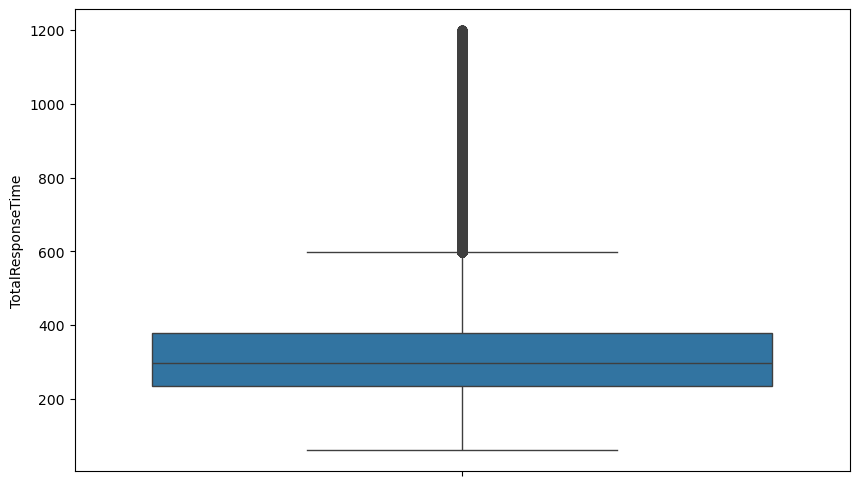

In [100]:
print(df_encoded_2["TotalResponseTime"].describe())

plt.figure(figsize = (10,6))
sns.boxplot(data = df_encoded_2, y = "TotalResponseTime")
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/box_rt.png', bbox_inches='tight')
plt.show

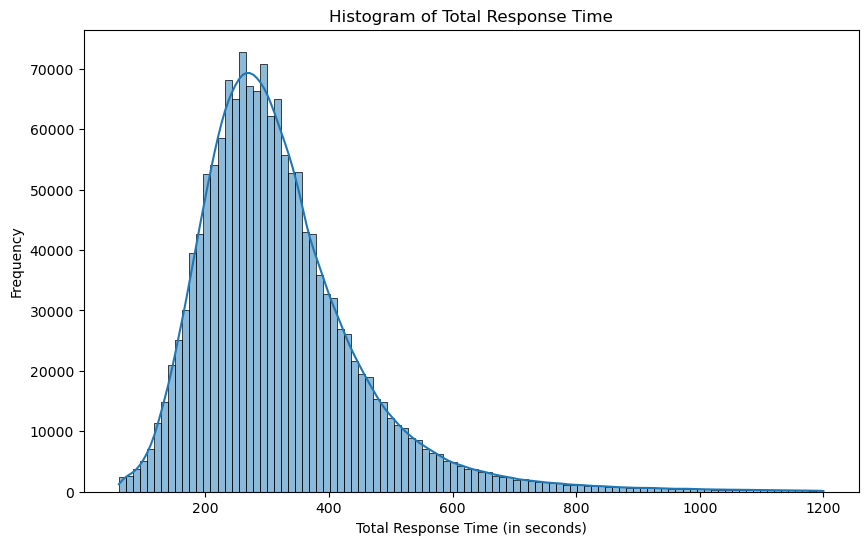

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded_2["TotalResponseTime"], bins=100, kde=True)
plt.title('Histogram of Total Response Time')
plt.xlabel("Total Response Time (in seconds)")
plt.ylabel('Frequency')
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/hist_rt.png', bbox_inches='tight')

plt.show()

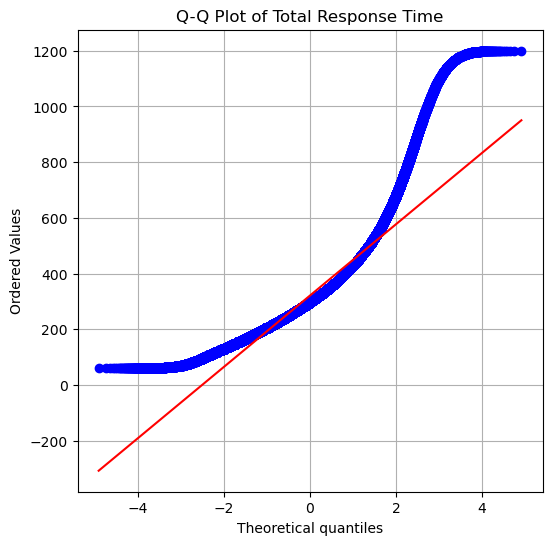

In [69]:
plt.figure(figsize=(6, 6))
stats.probplot(df_encoded_2["TotalResponseTime"], dist="norm", plot=plt)
plt.title('Q-Q Plot of Total Response Time')
plt.grid(True)
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/qq_rt.png', bbox_inches='tight')

plt.show()

In [67]:
# Anderson-Darling test for normality
anderson_test_1 = stats.anderson(df["TotalResponseTime"], dist='norm')
print(f'Anderson-Darling Test: Statistic={anderson_test_1.statistic}')
for i, (crit, sig_lvl) in enumerate(zip(anderson_test_1.critical_values, anderson_test_1.significance_level)):
    print(f'Critical value at {sig_lvl}% significance level: {crit}')

Anderson-Darling Test: Statistic=31717.63886869047
Critical value at 15.0% significance level: 0.576
Critical value at 10.0% significance level: 0.656
Critical value at 5.0% significance level: 0.787
Critical value at 2.5% significance level: 0.918
Critical value at 1.0% significance level: 1.092


### 1.2 Distribution of Log-Transformed Response Time

Natural Log

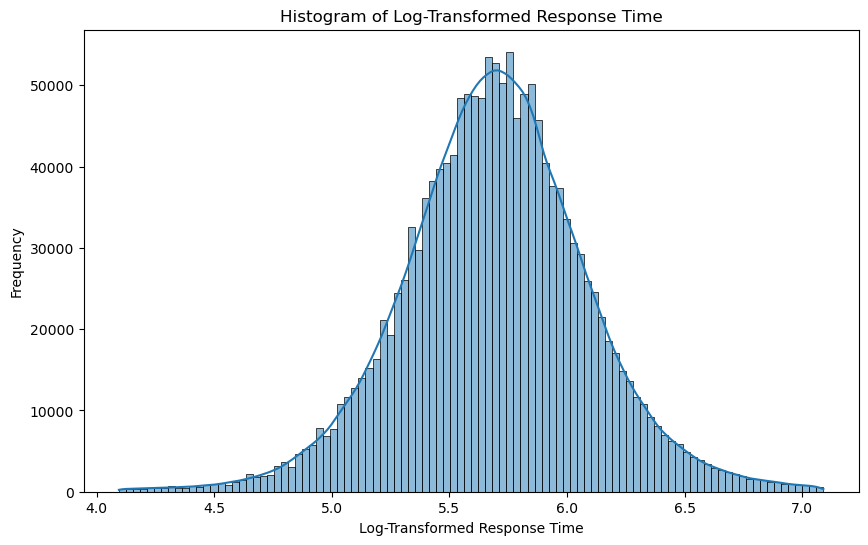

In [70]:
import scipy.stats as stats

log_response_time = df['TotalResponseTime'].apply(lambda x: np.log(x))

plt.figure(figsize=(10, 6))
sns.histplot(log_response_time, bins=100, kde=True)
plt.title('Histogram of Log-Transformed Response Time')
plt.xlabel("Log-Transformed Response Time")
plt.ylabel('Frequency')
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/hist_rt_log.png', bbox_inches='tight')

plt.show()

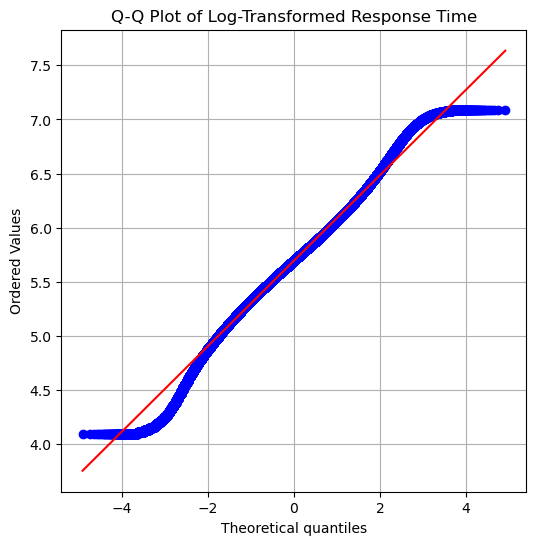

In [71]:
plt.figure(figsize=(6, 6))
stats.probplot(log_response_time, dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Response Time')
plt.grid(True)
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/qq_rt_log.png', bbox_inches='tight')
plt.show()

In [53]:
# Anderson-Darling test for normality
anderson_test_log = stats.anderson(log_response_time, dist='norm')
print(f'Anderson-Darling Test: Statistic={anderson_test_log.statistic}')
for i, (crit, sig_lvl) in enumerate(zip(anderson_test_log.critical_values, anderson_test_log.significance_level)):
    print(f'Critical value at {sig_lvl}% significance level: {crit}')

Anderson-Darling Test: Statistic=1863.356709226966
Critical value at 15.0% significance level: 0.576
Critical value at 10.0% significance level: 0.656
Critical value at 5.0% significance level: 0.787
Critical value at 2.5% significance level: 0.918
Critical value at 1.0% significance level: 1.092


In [74]:
log10_response_time = df['TotalResponseTime'].apply(lambda x: np.log10(x))
log2_response_time = df['TotalResponseTime'].apply(lambda x: np.log2(x))


In [87]:
def test_normality_and_plot(data, title, hist_filename, qq_filename):
    
    # Anderson-Darling test
    anderson_test_fun = stats.anderson(data, dist='norm')
    print(f'{title} - Anderson-Darling Test: Statistic={anderson_test_fun.statistic}')
    for i, (crit, sig_lvl) in enumerate(zip(anderson_test_fun.critical_values, anderson_test_fun.significance_level)):
        print(f'Critical value at {sig_lvl}% significance level: {crit}')
    
    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=100, edgecolor='black', alpha=0.7, kde = 100)
    plt.title(f'Histogram of {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.savefig(hist_filename, bbox_inches='tight')
    plt.show()
    
    # Q-Q Plot
    plt.figure(figsize=(6, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {title}')
    plt.grid(True)
    plt.savefig(qq_filename, bbox_inches='tight')
    plt.show()


Log10 Transformed Response Time - Anderson-Darling Test: Statistic=1863.3567092271987
Critical value at 15.0% significance level: 0.576
Critical value at 10.0% significance level: 0.656
Critical value at 5.0% significance level: 0.787
Critical value at 2.5% significance level: 0.918
Critical value at 1.0% significance level: 1.092


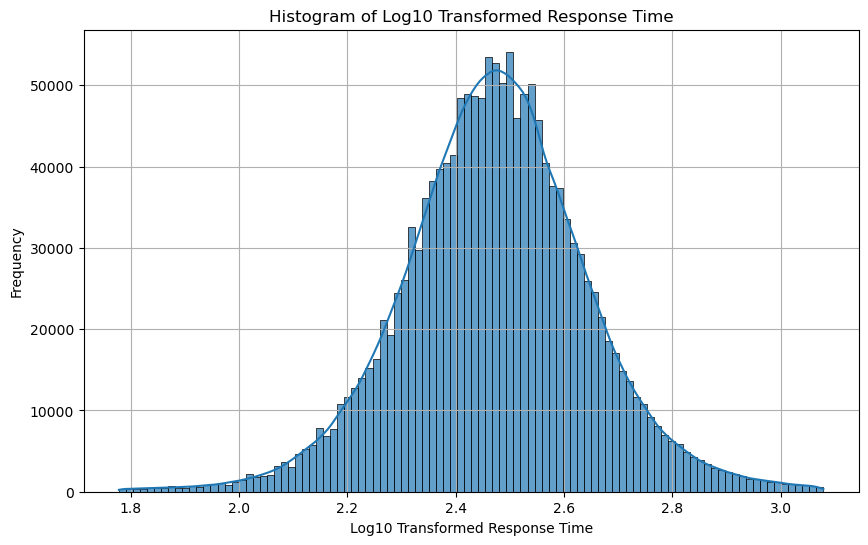

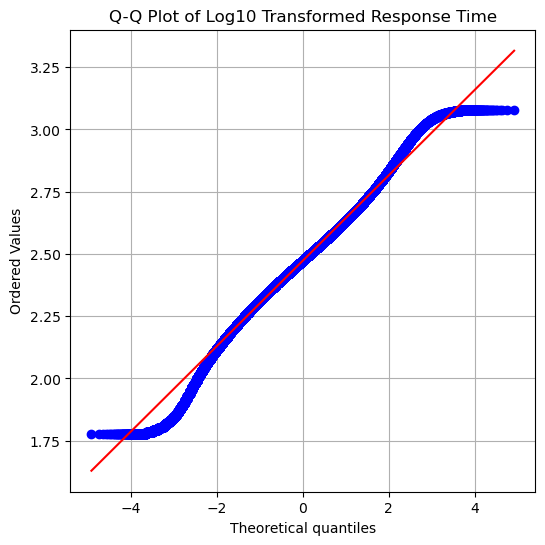

Log2 Transformed Response Time - Anderson-Darling Test: Statistic=1863.356709226966
Critical value at 15.0% significance level: 0.576
Critical value at 10.0% significance level: 0.656
Critical value at 5.0% significance level: 0.787
Critical value at 2.5% significance level: 0.918
Critical value at 1.0% significance level: 1.092


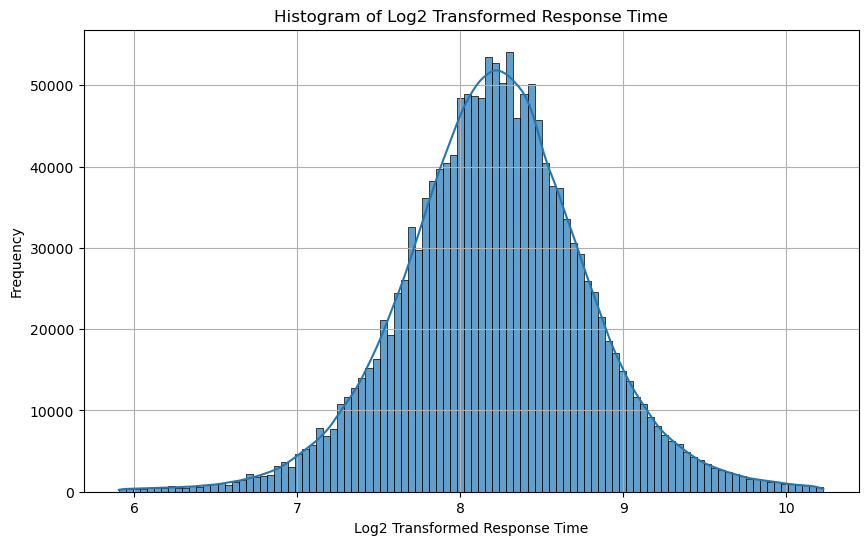

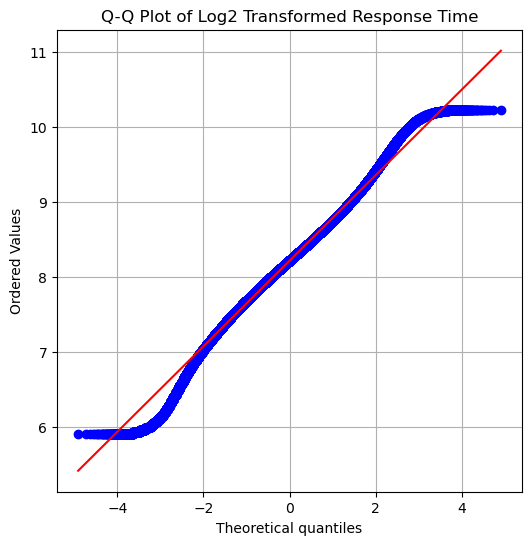

In [88]:
# Test and plot for log10 transformation
test_normality_and_plot(log10_response_time, 'Log10 Transformed Response Time',
                        '/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/hist_rt_log10.png',
                        '/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/qq_rt_log10.png')

# Test and plot for log2 transformation
test_normality_and_plot(log2_response_time, 'Log2 Transformed Response Time',
                        '/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/hist_rt_log2.png',
                        '/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/qq_rt_log2.png')


### 1.3 Distribution of Standardized Response Time

Standardize the response time values (Z-score normalization)

In [50]:
standardized_response_time = (df['TotalResponseTime'] - df['TotalResponseTime'].mean()) / df['TotalResponseTime'].std()

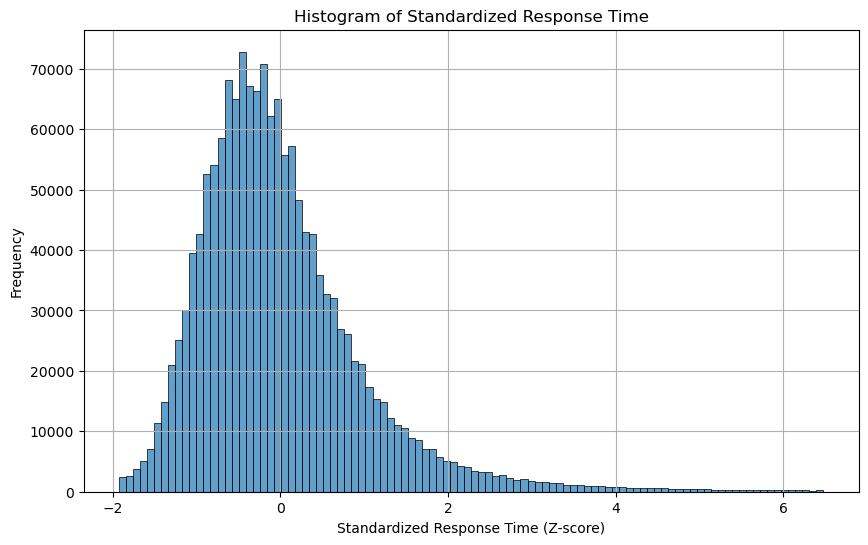

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(standardized_response_time, bins=100, edgecolor='black', alpha=0.7)
plt.title('Histogram of Standardized Response Time')
plt.xlabel('Standardized Response Time (Z-score)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/hist_rt_std.png', bbox_inches='tight')
plt.show()

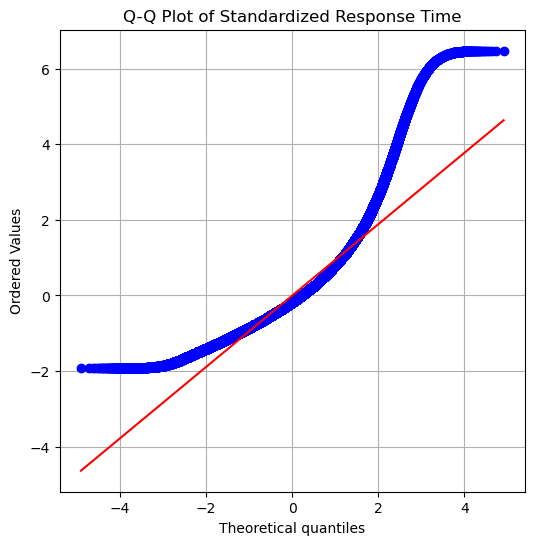

Anderson-Darling Test: Statistic=31717.63886869047
Critical value at 15.0% significance level: 0.576
Critical value at 10.0% significance level: 0.656
Critical value at 5.0% significance level: 0.787
Critical value at 2.5% significance level: 0.918
Critical value at 1.0% significance level: 1.092


In [73]:
# Q-Q plot for standardized values
plt.figure(figsize=(6, 6))
stats.probplot(standardized_response_time, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Response Time')
plt.grid(True)
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/qq_rt_std.png', bbox_inches='tight')
plt.show()

# Anderson-Darling test for normality
anderson_test_std = stats.anderson(standardized_response_time, dist='norm')
print(f'Anderson-Darling Test: Statistic={anderson_test_std.statistic}')
for i, (crit, sig_lvl) in enumerate(zip(anderson_test_std.critical_values, anderson_test_std.significance_level)):
    print(f'Critical value at {sig_lvl}% significance level: {crit}')

### 1.4 Box-Cox Transformation

In [89]:
from scipy.stats import boxcox

# Apply Box-Cox transformation
response_time_positive = df["TotalResponseTime"] + 1  # Add 1 to avoid log of zero if needed
boxcox_response_time, lmbda = boxcox(response_time_positive)


Box-Cox Transformed Response Time (lambda=0.024663627006128324) - Anderson-Darling Test: Statistic=1854.2068602826912
Critical value at 15.0% significance level: 0.576
Critical value at 10.0% significance level: 0.656
Critical value at 5.0% significance level: 0.787
Critical value at 2.5% significance level: 0.918
Critical value at 1.0% significance level: 1.092


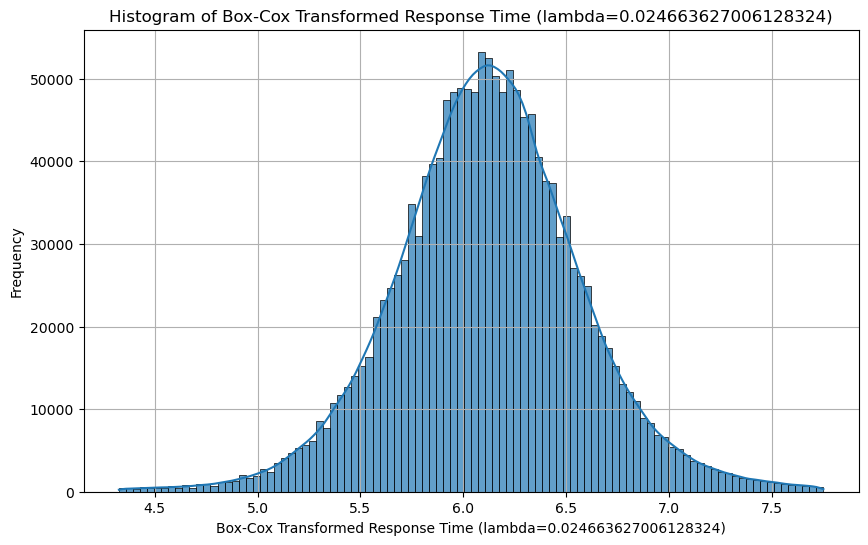

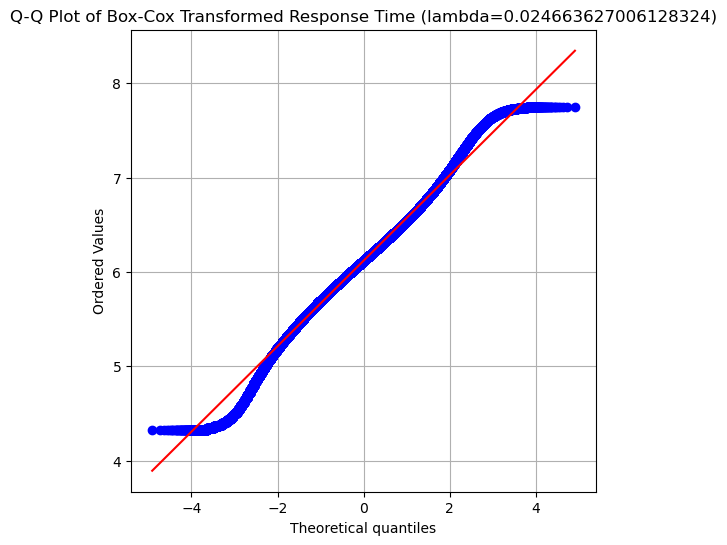

In [90]:

# Test and plot for Box-Cox transformation
test_normality_and_plot(boxcox_response_time, f'Box-Cox Transformed Response Time (lambda={lmbda})', 
                       '/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/hist_rt_boxcox.png',
                        '/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/qq_rt_boxcox.png')


In [91]:
# Anderson-Darling test for Box-Cox transformed data
anderson_test_boxcox = stats.anderson(boxcox_response_time, dist='norm')
print(f'Box-Cox Transformed Response Time (lambda={lmbda}) - Anderson-Darling Test: Statistic={anderson_test_boxcox.statistic}')
for i, (crit, sig_lvl) in enumerate(zip(anderson_test_boxcox.critical_values, anderson_test_boxcox.significance_level)):
    print(f'Critical value at {sig_lvl}% significance level: {crit}')


Box-Cox Transformed Response Time (lambda=0.024663627006128324) - Anderson-Darling Test: Statistic=1854.2068602826912
Critical value at 15.0% significance level: 0.576
Critical value at 10.0% significance level: 0.656
Critical value at 5.0% significance level: 0.787
Critical value at 2.5% significance level: 0.918
Critical value at 1.0% significance level: 1.092


### 2. Incident Groups

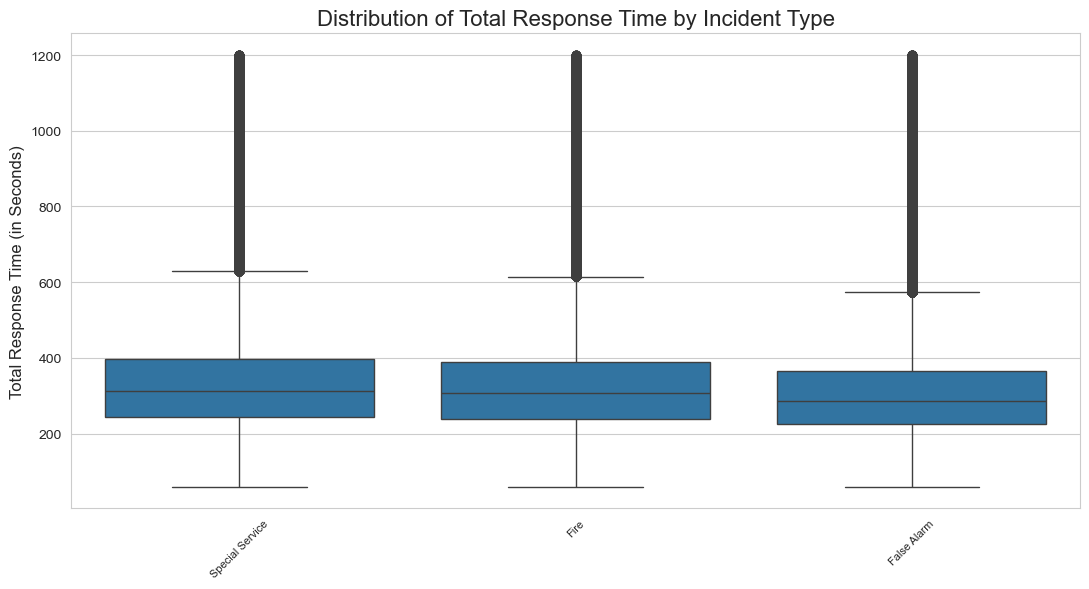

In [107]:
plt.figure(figsize=(11, 6))

sns.set_style("whitegrid")
box_plot = sns.boxplot(x = df_1["IncidentGroup"], y = df_1["TotalResponseTime"])
plt.title('Distribution of Total Response Time by Incident Type', fontsize=16)
plt.xlabel("")
plt.ylabel('Total Response Time (in Seconds)', fontsize=12)
plt.xticks(fontsize=8, rotation = 45)

plt.tight_layout()
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/box_rt_incgroup.png', bbox_inches='tight')
plt.show()

In [117]:
df_1.groupby(["IncidentGroup"])["TotalResponseTime"].std()


IncidentGroup
False Alarm       127.605
Fire              140.710
Special Service   144.227
Name: TotalResponseTime, dtype: float64

#### Statistical Test

In [93]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

model = smf.ols('TotalResponseTime ~ C(IncidentGroup)', data=df_1).fit()

anova_results = anova_lm(model)
print(anova_results)

alpha = 0.05
if anova_results["PR(>F)"][0] < alpha:
    print("There is a statistically significant difference between the incident types.")
else:
    print("There is no statistically significant difference between the incident types.")

                          df          sum_sq       mean_sq        F  PR(>F)
C(IncidentGroup)       2.000   254728685.022 127364342.511 6982.930   0.000
Residual         1537701.000 28046717392.224     18239.383      NaN     NaN
There is a statistically significant difference between the incident types.


/var/folders/mf/b1lhfbsd0_v8415y834bgj_c0000gn/T/ipykernel_94441/2250648598.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_results["PR(>F)"][0] < alpha:


/Users/bennyschellinger/miniforge3/envs/lfb_env/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1537704.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.8922647044676196
p-value: 1.7914090961381475e-161
Residuals do not appear to be normally distributed (reject H0)
Levene’s Test p-value: 0.0
Variances are not equal across groups (reject H0)


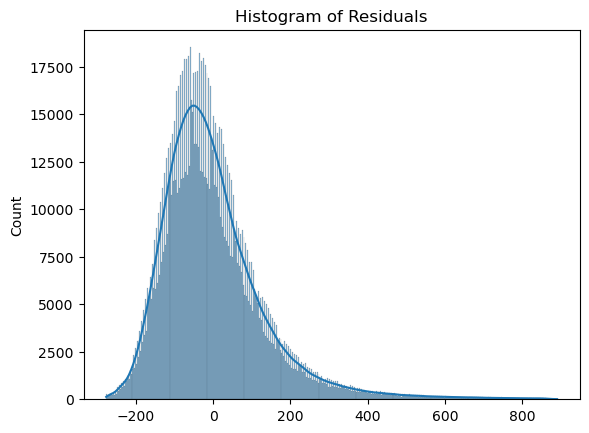

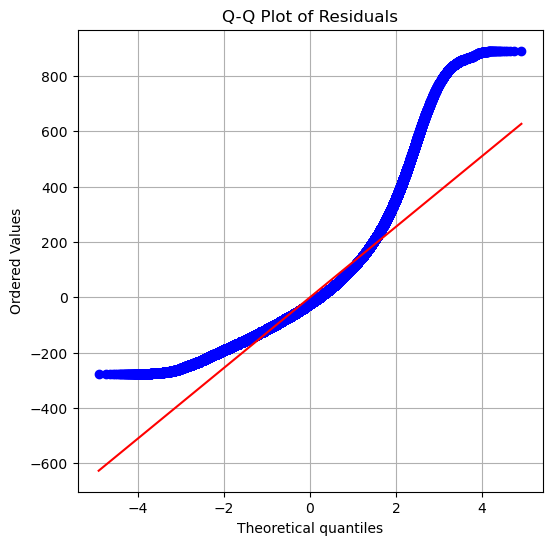

In [94]:
from scipy.stats import shapiro, levene
# Check for normality of residuals
residuals = model.resid
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p)
if p > 0.05:
    print("Residuals appear to be normally distributed (fail to reject H0)")
else:
    print("Residuals do not appear to be normally distributed (reject H0)")

# Check for homogeneity of variances
_, p = levene(df_1['TotalResponseTime'][df_1['IncidentGroup'] == 'Fire'],
              df_1['TotalResponseTime'][df_1['IncidentGroup'] == 'Special Service'],
              df_1['TotalResponseTime'][df_1['IncidentGroup'] == 'False Alarm'])
print('Levene’s Test p-value:', p)
if p > 0.05:
    print("Variances are equal across groups (fail to reject H0)")
else:
    print("Variances are not equal across groups (reject H0)")

# Plot residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
#plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/qq_rt_log.png', bbox_inches='tight')
plt.show()

In [146]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis H Test
stat, p = kruskal(df_1[df_1['IncidentGroup'] == 'Fire']['TotalResponseTime'],
                  df_1[df_1['IncidentGroup'] == 'Special Service']['TotalResponseTime'],
                  df_1[df_1['IncidentGroup'] == 'False Alarm']['TotalResponseTime'])
print('Kruskal-Wallis Test Statistic:', stat)
print('p-value:', p)

# Interpretation
alpha = 0.05
if p < alpha:
    print("There is a statistically significant difference between the incident groups (reject H0)")
else:
    print("There is no statistically significant difference between the incident groups (fail to reject H0)")

Kruskal-Wallis Test Statistic: 14696.198435959377
p-value: 0.0
There is a statistically significant difference between the incident groups (reject H0)


### AggregatedPropertyCategory

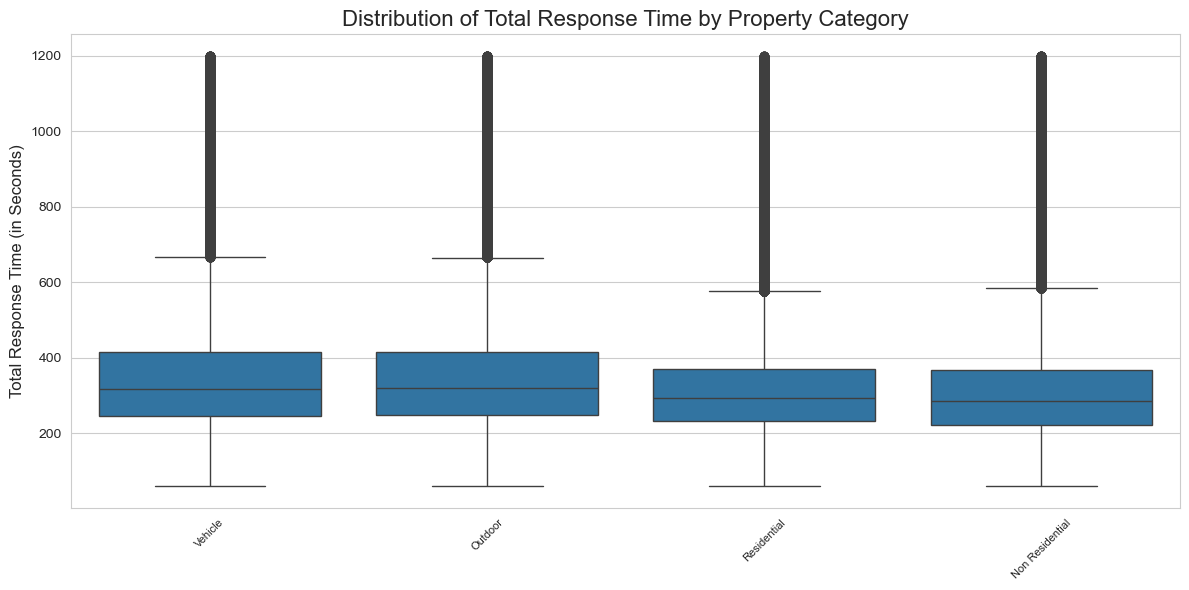

In [123]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
box_plot = sns.boxplot(x = df_1["AggregatedPropertyCategory"], y = df_1["TotalResponseTime"])

plt.title('Distribution of Total Response Time by Property Category', fontsize=16)
plt.xlabel("")
plt.ylabel('Total Response Time (in Seconds)', fontsize=12)
plt.xticks(fontsize=8, rotation = 45)

plt.tight_layout()
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/box_rt_aggproptype.png', bbox_inches='tight')
plt.show()

In [125]:
display(df_1.groupby(["AggregatedPropertyCategory"])["TotalResponseTime"].mean())
display(df_1.groupby(["AggregatedPropertyCategory"])["TotalResponseTime"].median())
display(df_1.groupby(["AggregatedPropertyCategory"])["TotalResponseTime"].std())


AggregatedPropertyCategory
Non Residential   310.376
Outdoor           352.200
Residential       313.649
Vehicle           352.076
Name: TotalResponseTime, dtype: float64

AggregatedPropertyCategory
Non Residential   287.000
Outdoor           321.000
Residential       294.000
Vehicle           319.000
Name: TotalResponseTime, dtype: float64

AggregatedPropertyCategory
Non Residential   132.112
Outdoor           157.887
Residential       124.302
Vehicle           162.789
Name: TotalResponseTime, dtype: float64

#### Statistical Test

In [96]:
model_prop = smf.ols('TotalResponseTime ~ C(AggregatedPropertyCategory)', data=df_1).fit()

anova_results_prop = anova_lm(model_prop)
print(anova_results_prop)

alpha = 0.05
if anova_results_prop["PR(>F)"][0] < alpha:
    print("There is a statistically significant difference between the property types.")
else:
    print("There is no statistically significant difference between the property types.")

                                       df          sum_sq       mean_sq  \
C(AggregatedPropertyCategory)       3.000   415306283.691 138435427.897   
Residual                      1537700.000 27886139793.553     18134.968   

                                     F  PR(>F)  
C(AggregatedPropertyCategory) 7633.619   0.000  
Residual                           NaN     NaN  
There is a statistically significant difference between the property types.


/var/folders/mf/b1lhfbsd0_v8415y834bgj_c0000gn/T/ipykernel_94441/3984679109.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_results_prop["PR(>F)"][0] < alpha:


/Users/bennyschellinger/miniforge3/envs/lfb_env/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1537704.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.8957551276727631
p-value: 2.2436697410804542e-160
Residuals do not appear to be normally distributed (reject H0)
Levene’s Test p-value: 0.0
Variances are not equal across groups (reject H0)


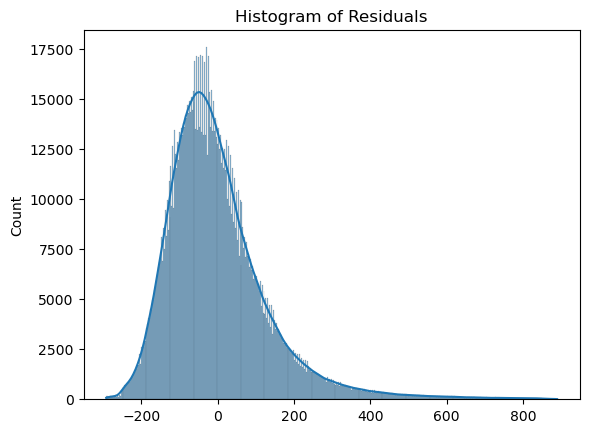

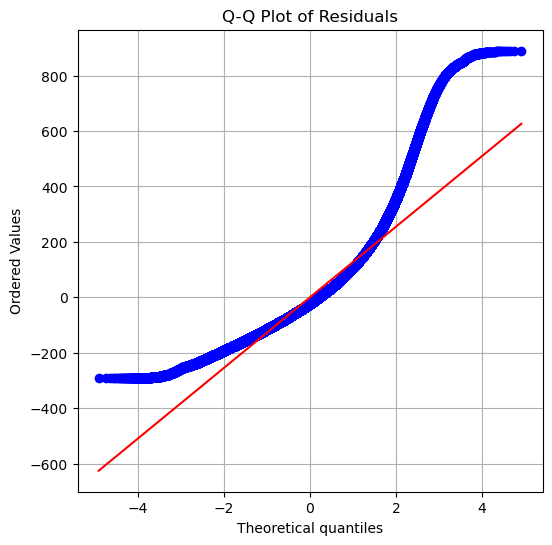

In [97]:
# Check for normality of residuals
residuals_prop = model_prop.resid
stat_prop, p_prop = shapiro(residuals_prop)
print('Shapiro-Wilk Test Statistic:', stat_prop)
print('p-value:', p_prop)
if p_prop > 0.05:
    print("Residuals appear to be normally distributed (fail to reject H0)")
else:
    print("Residuals do not appear to be normally distributed (reject H0)")

# Check for homogeneity of variances
_, p_hom_prop = levene(df_1['TotalResponseTime'][df_1['AggregatedPropertyCategory'] == 'Non Residential'],
              df_1['TotalResponseTime'][df_1['AggregatedPropertyCategory'] == 'Residential'],
              df_1['TotalResponseTime'][df_1['AggregatedPropertyCategory'] == 'Outdoor'],
              df_1['TotalResponseTime'][df_1['AggregatedPropertyCategory'] == 'Vehicle'])
print('Levene’s Test p-value:', p_hom_prop)
if p_hom_prop > 0.05:
    print("Variances are equal across groups (fail to reject H0)")
else:
    print("Variances are not equal across groups (reject H0)")

# Plot residuals
sns.histplot(residuals_prop, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals_prop, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
#plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/qq_rt_log.png', bbox_inches='tight')
plt.show()

In [99]:
from scipy.stats import kruskal

stat, p = kruskal(df_1[df_1['AggregatedPropertyCategory'] == 'Non Residential']['TotalResponseTime'],
                  df_1[df_1['AggregatedPropertyCategory'] == 'Outdoor']['TotalResponseTime'],
                  df_1[df_1['AggregatedPropertyCategory'] == 'Residential']['TotalResponseTime'],
                  df_1[df_1['AggregatedPropertyCategory'] == 'Vehicle']['TotalResponseTime'])
print('Kruskal-Wallis Test Statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p < alpha:
    print("There is a statistically significant difference between the property groups (reject H0)")
else:
    print("There is no statistically significant difference between the property groups (fail to reject H0)")

Kruskal-Wallis Test Statistic: 17445.783624803167
p-value: 0.0
There is a statistically significant difference between the property groups (reject H0)


### Total Response Time vs. Property & Incident Category

In [137]:
prop_order = df_1["AggregatedPropertyCategory"].value_counts(normalize=True)

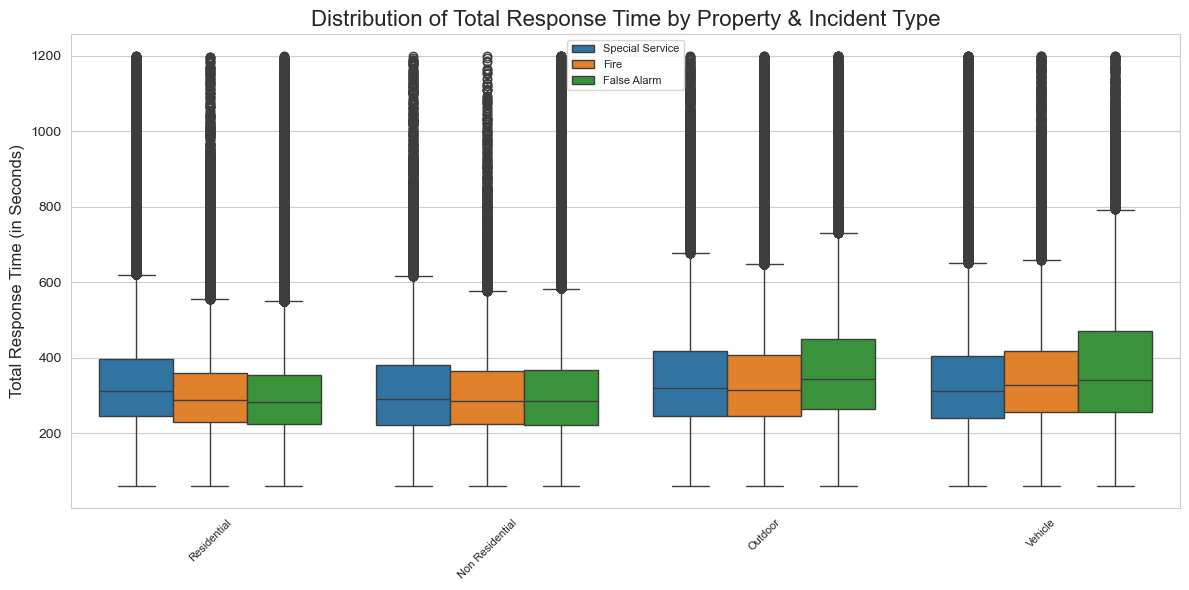

In [138]:
plt.figure(figsize=(12, 6))

sns.set_style("whitegrid")
box_plot = sns.boxplot(x = df_1["AggregatedPropertyCategory"], y = df_1["TotalResponseTime"], hue = df_1["IncidentGroup"], order=prop_order.index)

plt.title('Distribution of Total Response Time by Property & Incident Type', fontsize=16)
plt.xlabel("")
plt.ylabel('Total Response Time (in Seconds)', fontsize=12)
plt.xticks(fontsize=8, rotation = 45)
plt.legend(fontsize= 8)

plt.tight_layout()
plt.savefig('/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/30_Images/box_rt_propinctype.png', bbox_inches='tight')
plt.show()

In [140]:
display(df_1.groupby(["AggregatedPropertyCategory", "IncidentGroup"])["TotalResponseTime"].mean())
display(df_1.groupby(["AggregatedPropertyCategory", "IncidentGroup"])["TotalResponseTime"].median())
display(df_1.groupby(["AggregatedPropertyCategory", "IncidentGroup"])["TotalResponseTime"].std())


AggregatedPropertyCategory  IncidentGroup  
Non Residential             False Alarm       309.811
                            Fire              307.837
                            Special Service   318.153
Outdoor                     False Alarm       381.877
                            Fire              344.836
                            Special Service   352.333
Residential                 False Alarm       300.289
                            Fire              307.259
                            Special Service   336.237
Vehicle                     False Alarm       392.127
                            Fire              357.083
                            Special Service   342.333
Name: TotalResponseTime, dtype: float64

AggregatedPropertyCategory  IncidentGroup  
Non Residential             False Alarm       287.000
                            Fire              287.000
                            Special Service   292.000
Outdoor                     False Alarm       343.000
                            Fire              316.000
                            Special Service   320.000
Residential                 False Alarm       283.000
                            Fire              289.000
                            Special Service   313.000
Vehicle                     False Alarm       342.000
                            Fire              327.000
                            Special Service   312.000
Name: TotalResponseTime, dtype: float64

AggregatedPropertyCategory  IncidentGroup  
Non Residential             False Alarm       131.068
                            Fire              126.588
                            Special Service   146.118
Outdoor                     False Alarm       177.121
                            Fire              150.497
                            Special Service   163.653
Residential                 False Alarm       114.119
                            Fire              116.304
                            Special Service   137.825
Vehicle                     False Alarm       195.253
                            Fire              155.999
                            Special Service   157.296
Name: TotalResponseTime, dtype: float64

### Statistics

In [100]:
grouped_df = df_1.groupby(["AggregatedPropertyCategory", "IncidentGroup"])["TotalResponseTime"].mean().reset_index()

# Fit the model
model_comb = smf.ols('TotalResponseTime ~ C(AggregatedPropertyCategory) * C(IncidentGroup)', data=grouped_df).fit()

# Perform Shapiro-Wilk Test for normality
shapiro_stat, shapiro_p = shapiro(model_comb.resid)
print('Shapiro-Wilk Test Statistic:', shapiro_stat)
print('p-value:', shapiro_p)

# Check for normality
if shapiro_p > 0.05:
    print("Residuals appear to be normally distributed (fail to reject H0)")
else:
    print("Residuals do not appear to be normally distributed (reject H0)")

# Prepare data for Levene's test (requires individual data points, not means)
# Re-group the data to get individual response times per group
individual_df = df_1.groupby(["AggregatedPropertyCategory", "IncidentGroup"])

# Extract groups for Levene's test
groups = [group["TotalResponseTime"].values for name, group in individual_df]

# Perform Levene's test for homogeneity of variances
levene_stat, levene_p = levene(*groups)
print('Levene’s Test Statistic:', levene_stat)
print('p-value:', levene_p)

# Check for homogeneity of variances
if levene_p > 0.05:
    print("Variances are equal across groups (fail to reject H0)")
else:
    print("Variances are not equal across groups (reject H0)")

# Perform Kruskal-Wallis H Test
kruskal_stat, kruskal_p = kruskal(*groups)
print('Kruskal-Wallis Test Statistic:', kruskal_stat)
print('p-value:', kruskal_p)

# Interpretation
if kruskal_p < 0.05:
    print("There is a statistically significant difference between the groups (reject H0)")
else:
    print("There is no statistically significant difference between the groups (fail to reject H0)")

Shapiro-Wilk Test Statistic: 0.9446729654459783
p-value: 0.5608610734780602
Residuals appear to be normally distributed (fail to reject H0)
Levene’s Test Statistic: 1936.4578765315653
p-value: 0.0
Variances are not equal across groups (reject H0)
Kruskal-Wallis Test Statistic: 32940.85486910986
p-value: 0.0
There is a statistically significant difference between the groups (reject H0)
